In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [2]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2020/2/14 for Nair & Abraham 2010

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Total model number = (nmodle0) * nmodel

#iset=int(input('Input the total number of sets of models '))
#nmodel0=int(input('Input the total number of images per model'))
#nmodel=nmodel0*iset
nmodel=2000
print('nmodel',nmodel)

### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
batch_size = 100
#num_classes = 5
num_classes = 2
epochs = 300
nb_epoch=epochs
n_mesh=50
#nmodel=1000
print('nmodel',nmodel)
print('num_classes',num_classes)

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh


print(img_rows, img_cols, n_mesh2)
#stop



#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)
print(input_shape)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
#print(y_test.shape[0], 'y.test samples')
#print(str(y_test[0]))
#print(str(y_test[1]))
#print(str(y_test[2]))

#y_train = y_train.astype('int32')
#y_test = y_test.astype('int32')
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

nmodel 2000
nmodel 2000
num_classes 2
50 50 2499
(50, 50, 1)


In [3]:
# This is for simlation data sets
GD_W_DISC_PATH = "galaxy_data_including_disc/m1.dir/"
GD_WO_DISC_PATH = "galaxy_data_without_disc/m1.dir/"

GD_FN = "2dft.dat"
DATA_PART_NMODEL = int(nmodel/2)


def load_data(path, filename):
    return np.genfromtxt(os.path.join(path, filename), autostrip=True, max_rows=DATA_PART_NMODEL*n_mesh3)

x_dataset_wd = load_data(GD_W_DISC_PATH, GD_FN)
y_dataset_wd = np.ones((DATA_PART_NMODEL, 1), np.int)

x_dataset_wod = load_data(GD_WO_DISC_PATH, GD_FN)
y_dataset_wod = np.zeros((DATA_PART_NMODEL, 1), np.int)

x_dataset = np.append(x_dataset_wd, x_dataset_wod, axis=0)
y_dataset = np.append(y_dataset_wd, y_dataset_wod, axis=0)

np.savetxt("2dft.dat", x_dataset, '%1.8f')
np.savetxt("2dftn.dat", y_dataset, '%d')

x_dataset = x_dataset.reshape(nmodel, img_rows, img_cols, 1)
print(x_dataset.shape)
print(y_dataset.shape)

(2000, 50, 50, 1)
(2000, 1)


In [4]:
#from sklearn import model_selection
#x_train, x_test, y_train, y_test = model_selection.train_test_split(x_dataset, y_dataset, train_size=1f, random_state=1)

In [5]:
x_train = x_dataset; x_test = x_train; y_train = y_dataset; y_test = y_train

In [6]:
np.savetxt("2dfv_test_split.dat", x_test.flatten())
np.savetxt("2dftn_test_split.dat", y_test, '%d')

In [7]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [8]:
#stop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


print('save the architecture of a model')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Epoch 1/300
20/20 [==============================] - 3s 83ms/step - loss: 0.6934 - accuracy: 0.4989 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6960 - accuracy: 0.4661 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/300
20/20 [==============================] - 1s 26ms/step - loss: 0.6929 - accuracy: 0.5014 - val_loss: 0.6935 - val_accuracy: 0.4785
Epoch 4/300
20/20 [==============================] - 1s 25ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4520
Epoch 5/300
20/20 [==============================] - 0s 25ms/step - loss: 0.6934 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.4540
Epoch 6/300
20/20 [==============================] - 0s 24ms/step - loss: 0.6932 - accuracy: 0.4829 - val_loss: 0.6932 - val_accuracy: 0.4555
Epoch 7/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6934 - accuracy: 0.5149 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 

20/20 [==============================] - 0s 22ms/step - loss: 0.6914 - accuracy: 0.5273 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 59/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6928 - accuracy: 0.5073 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 60/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6906 - accuracy: 0.5357 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 61/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6915 - accuracy: 0.5332 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 62/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6920 - accuracy: 0.5273 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 63/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6913 - accuracy: 0.5250 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 64/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6912 - accuracy: 0.5267 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 65/300

20/20 [==============================] - 0s 23ms/step - loss: 0.6878 - accuracy: 0.5639 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 116/300
20/20 [==============================] - 0s 24ms/step - loss: 0.6905 - accuracy: 0.5329 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 117/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6902 - accuracy: 0.5224 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 118/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6885 - accuracy: 0.5732 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 119/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6893 - accuracy: 0.5624 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 120/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6883 - accuracy: 0.5553 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 121/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6899 - accuracy: 0.5471 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 

Epoch 172/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6865 - accuracy: 0.5650 - val_loss: 0.6863 - val_accuracy: 0.5040
Epoch 173/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6883 - accuracy: 0.5701 - val_loss: 0.6862 - val_accuracy: 0.5060
Epoch 174/300
20/20 [==============================] - 1s 26ms/step - loss: 0.6876 - accuracy: 0.5623 - val_loss: 0.6862 - val_accuracy: 0.5060
Epoch 175/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6868 - accuracy: 0.5833 - val_loss: 0.6861 - val_accuracy: 0.5060
Epoch 176/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6889 - accuracy: 0.5687 - val_loss: 0.6861 - val_accuracy: 0.5075
Epoch 177/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6851 - accuracy: 0.6043 - val_loss: 0.6860 - val_accuracy: 0.5080
Epoch 178/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6872 - accuracy: 0.5820 - val_loss: 0.6860 - val_accuracy:

Epoch 229/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6849 - accuracy: 0.6067 - val_loss: 0.6836 - val_accuracy: 0.5565
Epoch 230/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6859 - accuracy: 0.5860 - val_loss: 0.6836 - val_accuracy: 0.5540
Epoch 231/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6844 - accuracy: 0.6036 - val_loss: 0.6835 - val_accuracy: 0.5565
Epoch 232/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6838 - accuracy: 0.5928 - val_loss: 0.6835 - val_accuracy: 0.5530
Epoch 233/300
20/20 [==============================] - 0s 24ms/step - loss: 0.6841 - accuracy: 0.6092 - val_loss: 0.6834 - val_accuracy: 0.5575
Epoch 234/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6846 - accuracy: 0.6011 - val_loss: 0.6834 - val_accuracy: 0.5645
Epoch 235/300
20/20 [==============================] - 0s 24ms/step - loss: 0.6849 - accuracy: 0.5904 - val_loss: 0.6834 - val_accuracy:

Epoch 286/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6785 - accuracy: 0.6485 - val_loss: 0.6807 - val_accuracy: 0.6700
Epoch 287/300
20/20 [==============================] - 0s 24ms/step - loss: 0.6808 - accuracy: 0.6326 - val_loss: 0.6807 - val_accuracy: 0.6900
Epoch 288/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6843 - accuracy: 0.5943 - val_loss: 0.6806 - val_accuracy: 0.7000
Epoch 289/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6820 - accuracy: 0.6234 - val_loss: 0.6805 - val_accuracy: 0.6965
Epoch 290/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6810 - accuracy: 0.6184 - val_loss: 0.6805 - val_accuracy: 0.6845
Epoch 291/300
20/20 [==============================] - 0s 23ms/step - loss: 0.6833 - accuracy: 0.5935 - val_loss: 0.6804 - val_accuracy: 0.6820
Epoch 292/300
20/20 [==============================] - 0s 22ms/step - loss: 0.6817 - accuracy: 0.6095 - val_loss: 0.6804 - val_accuracy:

float64
(50, 50, 1)


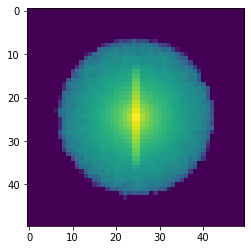

In [9]:
from matplotlib import image
from matplotlib import pyplot

# summarize shape of the pixel array
print(x_train[0].dtype)
print(x_train[0].shape)
# display the array of pixels as an image
pyplot.imshow(x_train[0])
pyplot.show()